<h2>Desafio 4 - Trabajo Final</h2>

<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
<h3>Limpieza y exploración de datos



<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Exploración](#section_exploration)




<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [333]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Plotly Libraries
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots



<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [334]:
df = pd.read_csv('Data/emision-co2-autos_limpio.csv')

In [335]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_id_motor,vehiculo_cilindrada,vehiculo_potencia,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,lca_numero,fecha_firma,ensayo_gei_numero,ensayo_gei_laboratorio,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto,id_etiqueta
0,TOYOTA,LAND CRUISER 200,SUV,4x4,TOYOTA 1VD-FTV,4461.0,NaN,AUTOMATICA,GAS OIL,EURO V,NaN,04/10/2017,H1860666086/241,VINÇOTTE nv,260.70,11.56,8.94,9.90,000001A
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,RENAULT M4RK7,1997.0,NaN,CVT,NAFTA,EURO V,NaN,22/06/2016,09/09790,UTAC,175.40,10.50,6.10,7.70,000178A
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0210/17,DELPHI,198.86,11.13,6.98,8.52,000650C
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,RENAULT F4R E4,1998.0,105,MANUAL,NAFTA,EURO V,NaN,NaN,R1-0209/17,DELPHI,199.74,11.20,7.01,8.55,000659C
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,CITROËN EP6CDTM (5FM),1598.0,NaN,AUTOMATICA,NAFTA,EURO V,NaN,11/10/2011,11/04511,UTAC,177.60,10.60,6.00,7.70,000106A


In [336]:
df.dtypes

vehiculo_marca                object
vehiculo_modelo               object
vehiculo_tipo                 object
vehiculo_traccion             object
vehiculo_id_motor             object
vehiculo_cilindrada          float64
vehiculo_potencia             object
vehiculo_tipo_transmision     object
vehiculo_tipo_combustible     object
vehiculo_standard_emision     object
lca_numero                   float64
fecha_firma                   object
ensayo_gei_numero             object
ensayo_gei_laboratorio        object
emision_CO2                  float64
consumo_urbano               float64
consumo_extraurbano          float64
consumo_mixto                float64
id_etiqueta                   object
dtype: object

In [337]:
df.shape

(412, 19)

In [338]:
# Total de datos faltantes
df.isna().any(axis=1).sum()

312

In [339]:
# Datos faltantes por columna
df.isna().sum()

vehiculo_marca                 0
vehiculo_modelo                0
vehiculo_tipo                  0
vehiculo_traccion              0
vehiculo_id_motor              0
vehiculo_cilindrada            1
vehiculo_potencia            287
vehiculo_tipo_transmision      0
vehiculo_tipo_combustible      0
vehiculo_standard_emision      3
lca_numero                   119
fecha_firma                    8
ensayo_gei_numero              0
ensayo_gei_laboratorio         0
emision_CO2                    0
consumo_urbano                 2
consumo_extraurbano            2
consumo_mixto                  0
id_etiqueta                    0
dtype: int64

In [340]:
# Elimino las columnas con mayor cantidad de datos faltantes y las que considero que no voy a utilizar para el análisis
df.drop(['vehiculo_potencia','lca_numero', 'vehiculo_id_motor','vehiculo_id_motor','fecha_firma','ensayo_gei_numero','ensayo_gei_laboratorio','id_etiqueta'], axis=1, inplace=True)

In [341]:
df.shape

(412, 12)

In [342]:
df.isna().any(axis=1).sum()

6

In [343]:
df.dropna(inplace=True)

In [344]:
df.reset_index(inplace = True, drop =True)

In [345]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [346]:
df.shape

(406, 12)

In [347]:
df.isna().sum()

vehiculo_marca               0
vehiculo_modelo              0
vehiculo_tipo                0
vehiculo_traccion            0
vehiculo_cilindrada          0
vehiculo_tipo_transmision    0
vehiculo_tipo_combustible    0
vehiculo_standard_emision    0
emision_CO2                  0
consumo_urbano               0
consumo_extraurbano          0
consumo_mixto                0
dtype: int64

<a id="section_exploration"></a> 
<h3> Exploración </h3>

[volver a TOC](#section_toc)

In [348]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,SEDÁN 4 PUERTAS,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,SEDÁN 5 PUERTAS,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,SEDÁN 5 PUERTAS,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,COUPÉ 3 + 2 PUERTAS,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [349]:
df['vehiculo_marca'].value_counts()

MERCEDES-BENZ        31
HYUNDAI              31
CHEVROLET            25
BMW                  23
AUDI                 21
TOYOTA               20
FORD                 18
FIAT                 17
RENAULT              17
MINI                 16
HONDA                15
VOLKSWAGEN           15
PEUGEOT              13
NISSAN               12
CITROËN              10
CHANGAN               9
LIFAN                 8
LEXUS                 8
SUZUKI                7
JEEP                  7
LAND ROVER            6
PEUGEOT / CITROËN     6
FAW                   5
ALFA ROMEO            4
ZOTYE                 4
JAC                   4
BAIC                  4
MASERATI              4
DOMY                  4
BORGWARD              4
PORSCHE               3
DS                    3
HAVAL                 3
KIA                   3
MITSUBISHI            3
MERCEDES-AMG          2
CHERY                 2
SUBARU                2
ISUZU                 2
VOLVO                 2
ZANELLA               2
RAM             

<AxesSubplot:xlabel='consumo_urbano', ylabel='vehiculo_marca'>

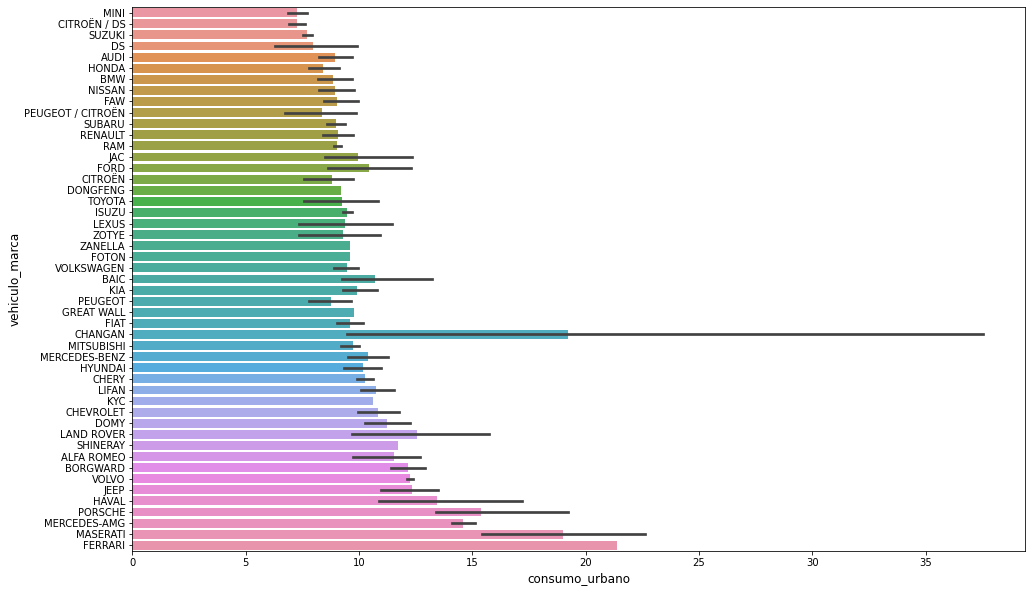

In [350]:
#mkI = df['vehiculo_marca'].value_counts().index
#mkV = df['emision_CO2'].median().index
#mkV = df.groupby(['vehiculo_marca'])[['emision_CO2']].apply(np.median)

#plt.figure(figsize = (10,8))
#sns.barplot(mkI,mkV)
#plt.xticks(rotation='vertical')
norm = plt.Normalize(df["consumo_urbano"].values.min(), df["consumo_urbano"].values.max())
colors = plt.cm.Reds(norm(df["consumo_urbano"])) 
plt.figure(figsize=(16,10))
plt.ylabel('Consumo Urbano', fontsize=12)
plt.xlabel('Marca', fontsize=12)
result = df.groupby(["vehiculo_marca"])['consumo_urbano'].aggregate(np.median).reset_index().sort_values('consumo_urbano')
sns.barplot(x='consumo_urbano', y="vehiculo_marca", data=df,  order=result['vehiculo_marca'])

<AxesSubplot:xlabel='emision_CO2', ylabel='vehiculo_marca'>

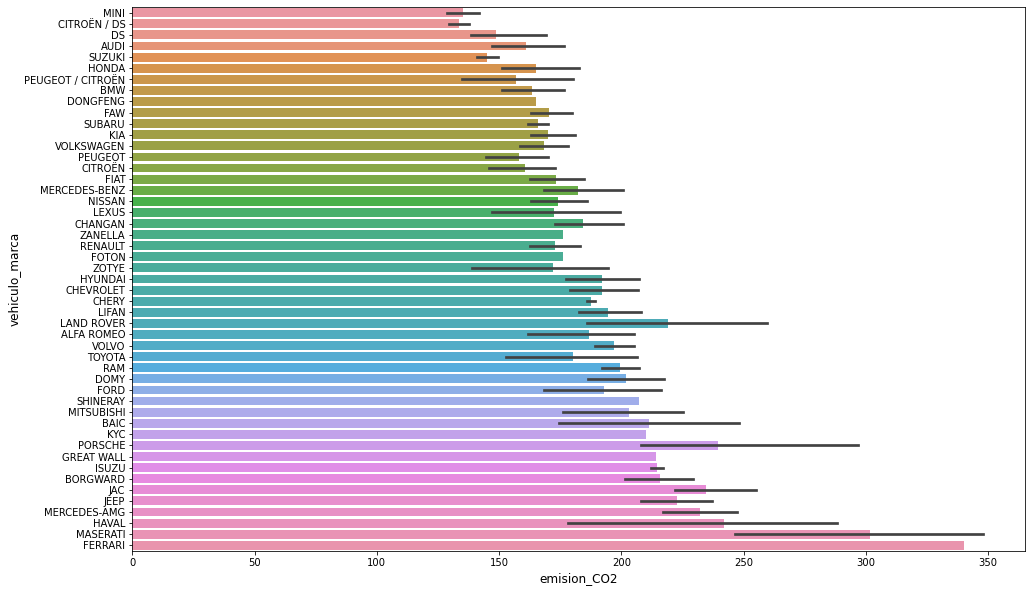

In [351]:
norm = plt.Normalize(df["emision_CO2"].values.min(), df["emision_CO2"].values.max())

plt.figure(figsize=(16,10))
plt.ylabel('Emision CO2', fontsize=12)
plt.xlabel('Marca', fontsize=12)
result = df.groupby(["vehiculo_marca"])['emision_CO2'].aggregate(np.median).reset_index().sort_values('emision_CO2')
sns.barplot(x='emision_CO2', y="vehiculo_marca", data=df, order=result['vehiculo_marca'])

In [352]:
df['vehiculo_marca'].unique()

array(['TOYOTA', 'RENAULT', 'CITROËN', 'LEXUS', 'PEUGEOT', 'FORD',
       'PEUGEOT / CITROËN', 'HYUNDAI', 'SUZUKI', 'CHEVROLET', 'LIFAN',
       'BMW', 'CITROËN / DS', 'HONDA', 'NISSAN', 'FIAT', 'CHERY',
       'VOLKSWAGEN', 'ALFA ROMEO', 'FAW', 'MERCEDES-BENZ', 'JEEP',
       'LAND ROVER', 'JAC', 'VOLVO', 'SHINERAY', 'CHANGAN', 'DS', 'MINI',
       'DOMY', 'BORGWARD', 'PORSCHE', 'AUDI', 'BAIC', 'ZANELLA', 'RAM',
       'FOTON', 'MASERATI', 'SUBARU', 'HAVAL', 'ISUZU', 'DONGFENG',
       'MERCEDES-AMG', 'MITSUBISHI', 'ZOTYE', 'KIA', 'GREAT WALL', 'KYC',
       'FERRARI'], dtype=object)

In [353]:
df_Make=df['vehiculo_marca'].value_counts().reset_index().rename(columns={'index':'vehiculo_marca','vehiculo_marca':'Count'})[0:25]
df_Make
fig = go.Figure(go.Bar(x=df_Make['vehiculo_marca'],y=df_Make['Count'],
        marker={'color': df_Make['Count'], 'colorscale': 'Viridis'}, 
        text=df_Make['Count'],
        textposition = "outside",
))
fig.update_layout(title_text='Top 25 Company',xaxis_title="Company ",yaxis_title="Number Of Vehicles ",title_x=0.5)
fig.show()

In [354]:
df['vehiculo_tipo'].value_counts()

SEDÁN 4 PUERTAS                                            39
SEDÁN 5 PUERTAS                                            38
SUV                                                        31
RURAL                                                      29
BERLINA                                                    21
                                                           ..
SEDÁN 5 PUERTAS / COUPÉ                                     1
PICK UP: CAJA BAJA JAULA CAJA PAQUETERA FURGÓN              1
BERLINA 3 PUERTAS CABRIOLET                                 1
SEDÁN 4 PUERTAS - COUPÉ 2 PUERTAS                           1
MONOVOLÚMEN 4 PUERTAS Y PORTÓN TRASERO (5 / 7 ASIENTOS)     1
Name: vehiculo_tipo, Length: 97, dtype: int64

In [355]:
tipo_df = pd.read_csv('Data/tipo_vehiculos.csv')

In [356]:
tipo_df_dic = tipo_df.set_index('ID').T.to_dict('list')

In [357]:
df.vehiculo_tipo = df.vehiculo_tipo.replace(tipo_df_dic)


In [358]:
df['vehiculo_tipo'].value_counts()

4 Puertas    103
5 Puertas     86
Rural         54
Coupe         51
SUV           47
PICK UP       46
Furgon         6
Camion         6
BUS            4
4x4            3
Name: vehiculo_tipo, dtype: int64

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

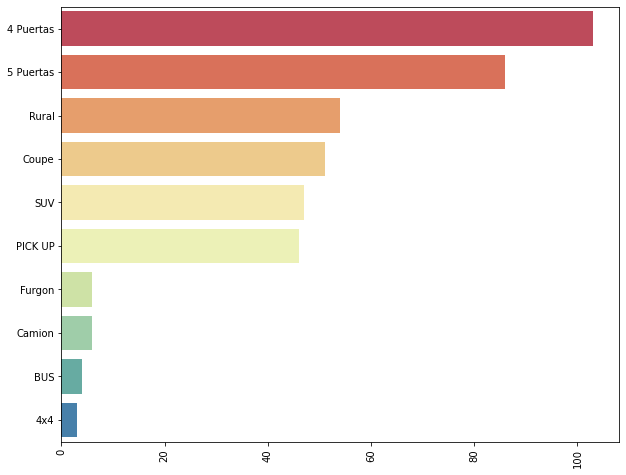

In [359]:
mkI = df['vehiculo_tipo'].value_counts().index
mkV = df['vehiculo_tipo'].value_counts().values
plt.figure(figsize = (10,8))
sns.barplot(mkV,mkI, orient = 'h', palette='Spectral')
plt.xticks(rotation='vertical')

<AxesSubplot:xlabel='emision_CO2', ylabel='vehiculo_tipo'>

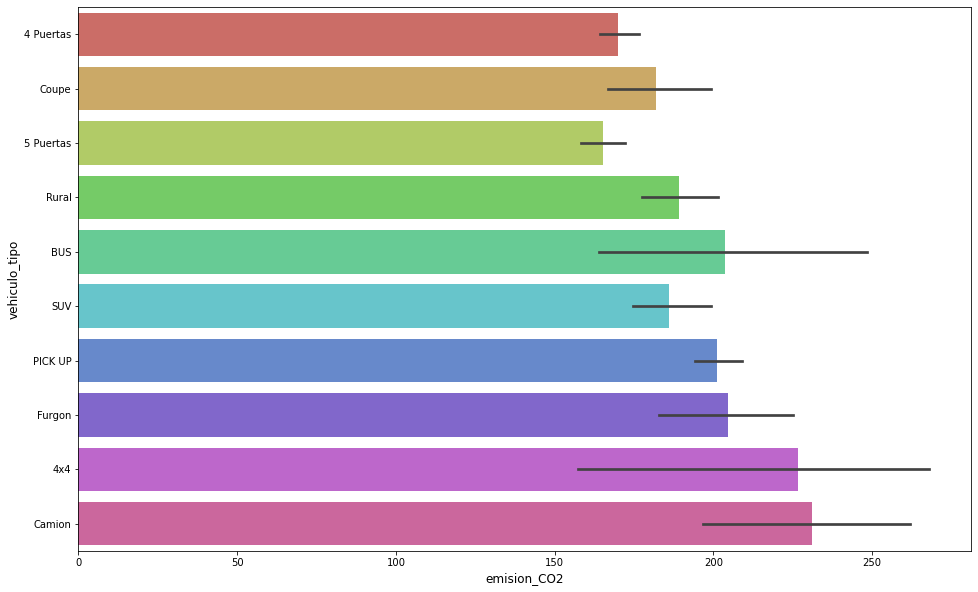

In [360]:
norm = plt.Normalize(df["emision_CO2"].values.min(), df["emision_CO2"].values.max())
plt.figure(figsize=(16,10))
plt.ylabel('Emision CO2', fontsize=12)
plt.xlabel('Vehiculo Tipo', fontsize=12)
result = df.groupby(["vehiculo_tipo"])['emision_CO2'].aggregate(np.median).reset_index().sort_values('emision_CO2')
sns.barplot(x='emision_CO2', y="vehiculo_tipo", data=df, palette = 'hls', order=result['vehiculo_tipo'])

<AxesSubplot:xlabel='emision_CO2', ylabel='vehiculo_tipo'>

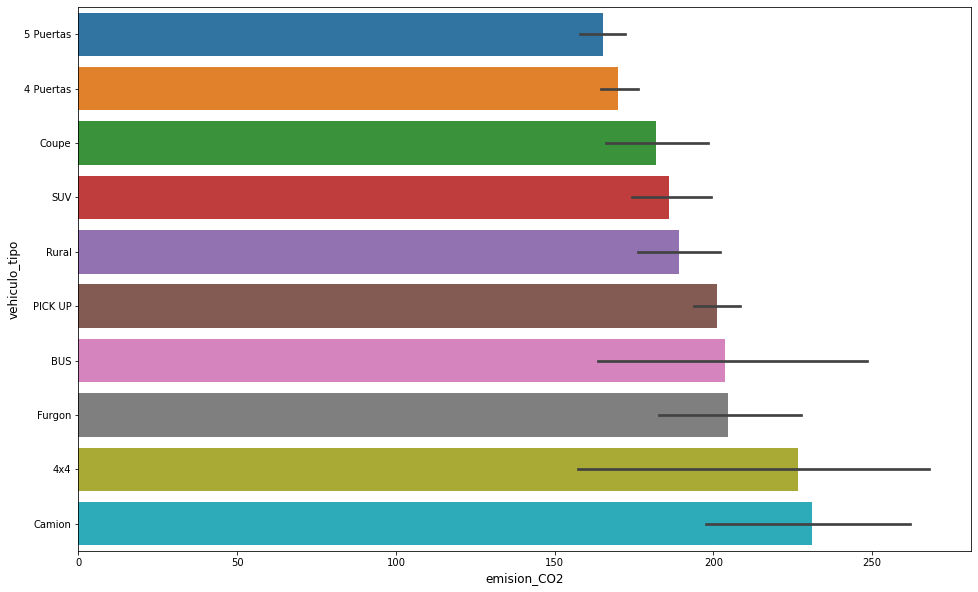

In [361]:
norm = plt.Normalize(df["emision_CO2"].values.min(), df["emision_CO2"].values.max())
plt.figure(figsize=(16,10))
plt.ylabel('Emision CO2', fontsize=12)
plt.xlabel('Vehiculo Tipo', fontsize=12)
result = df.groupby(["vehiculo_tipo"])['emision_CO2'].aggregate(np.mean).reset_index().sort_values('emision_CO2')
sns.barplot(x='emision_CO2', y="vehiculo_tipo", data=df, order=result['vehiculo_tipo'])

<AxesSubplot:xlabel='emision_CO2', ylabel='vehiculo_tipo_combustible'>

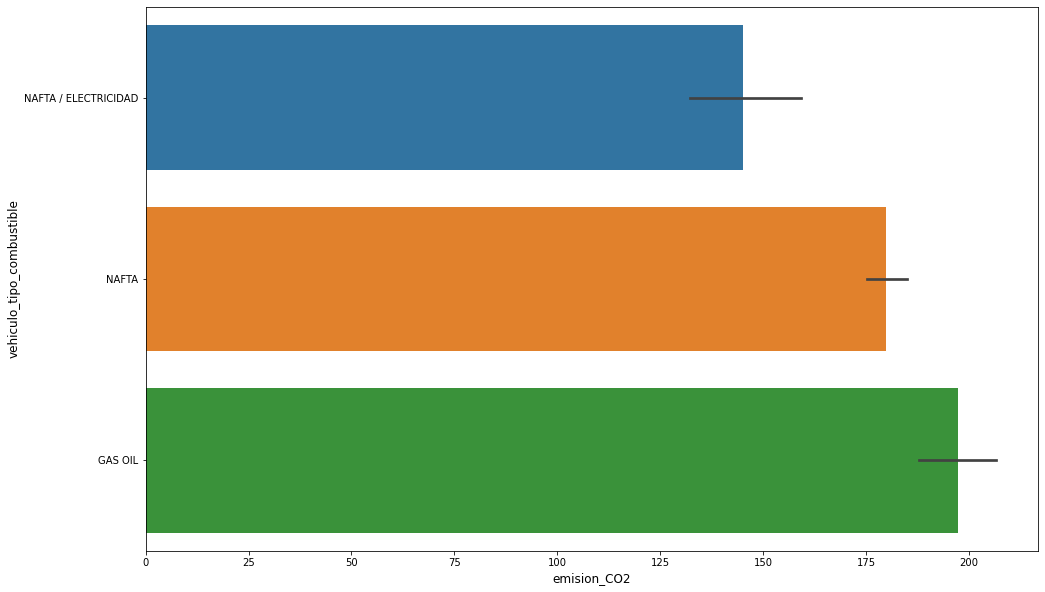

In [362]:
norm = plt.Normalize(df["emision_CO2"].values.min(), df["emision_CO2"].values.max())
plt.figure(figsize=(16,10))
plt.ylabel('Emision CO2', fontsize=12)
plt.xlabel('Vehiculo Combustible', fontsize=12)
result = df.groupby(["vehiculo_tipo_combustible"])['emision_CO2'].aggregate(np.median).reset_index().sort_values('emision_CO2')
sns.barplot(x='emision_CO2', y="vehiculo_tipo_combustible", data=df, order=result['vehiculo_tipo_combustible'])

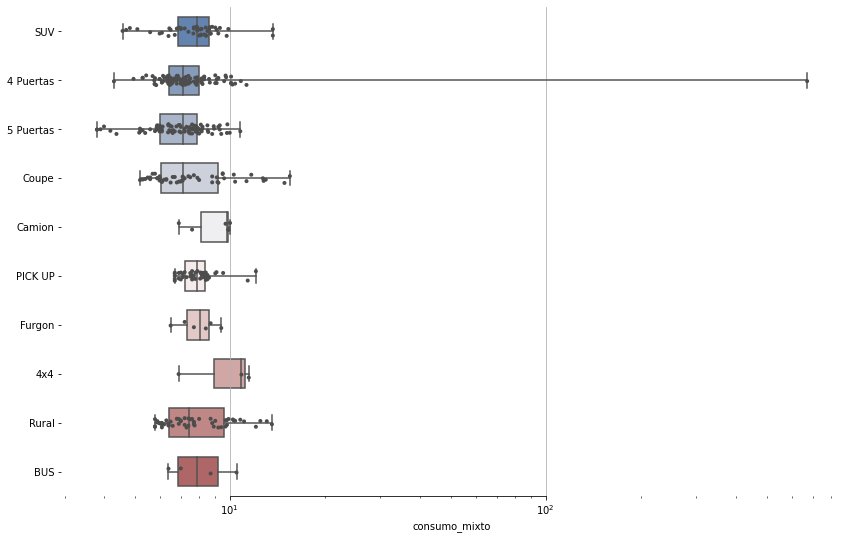

In [363]:
#sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 9))
ax.set_xscale("log")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="consumo_mixto", y="vehiculo_tipo", data=df,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="consumo_mixto", y="vehiculo_tipo", data=df,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [364]:
#Outlier 4Puertas x consumo Mixto
max_consumo_mixto = df['consumo_mixto'].max()
df[df['consumo_mixto'] == max_consumo_mixto]

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
370,CHEVROLET,CRUZE 1.4 TRANSMISIÓN AUTOMÁTICA,4 Puertas,4x2,1399.0,AUTOMATICA,NAFTA,EURO V,156.1,6.26,5.84,672.0


/home/ignacio/anaconda3/envs/dhdsblend/lib/python3.7/site-packages/seaborn/axisgrid.py:1742: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



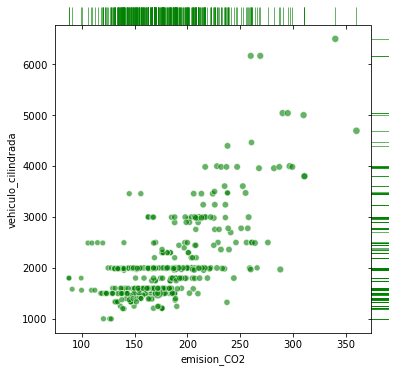

In [365]:
# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=df, x="emision_CO2", y="vehiculo_cilindrada", space=0, ratio=17)
g.plot_joint(sns.scatterplot, size=df["consumo_urbano"], sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

[Text(0, 0.5, '')]

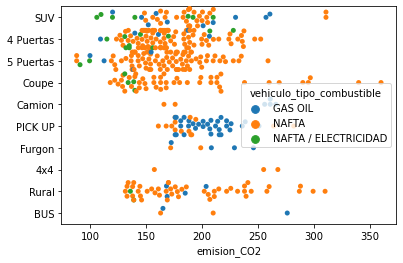

In [366]:
# Draw a categorical scatterplot to show each observation
ax = sns.swarmplot(data=df, x="emision_CO2", y="vehiculo_tipo", hue="vehiculo_tipo_combustible")
ax.set(ylabel="")

In [367]:
df['vehiculo_traccion'].value_counts()

4x2          286
4x4           95
4x2 - 4x4     25
Name: vehiculo_traccion, dtype: int64

In [368]:
df['vehiculo_tipo_transmision'].value_counts()

AUTOMATICA                                     223
MANUAL                                         147
CVT                                             33
MANUAL AUTOMATIZADA                              1
CTT                                              1
E-CVT (Hibrida controlada electrónicamente)      1
Name: vehiculo_tipo_transmision, dtype: int64

In [369]:
df['vehiculo_tipo_combustible'].value_counts()

NAFTA                   316
GAS OIL                  65
NAFTA / ELECTRICIDAD     25
Name: vehiculo_tipo_combustible, dtype: int64

In [370]:
df['vehiculo_standard_emision'].value_counts()

EURO V        264
EURO VI b      49
EURO VI c      39
EURO VI        24
EURO  V        18
EURO VI a       5
EURO VI d       5
EURO  VI b      1
EURUO V         1
Name: vehiculo_standard_emision, dtype: int64

In [371]:
df.columns


Index(['vehiculo_marca', 'vehiculo_modelo', 'vehiculo_tipo',
       'vehiculo_traccion', 'vehiculo_cilindrada', 'vehiculo_tipo_transmision',
       'vehiculo_tipo_combustible', 'vehiculo_standard_emision', 'emision_CO2',
       'consumo_urbano', 'consumo_extraurbano', 'consumo_mixto'],
      dtype='object')

In [372]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
vehiculo_cilindrada,406.0,2084.467980,796.148300,997.00,1587.0000,1984.0,2298.0000,6496.00
emision_CO2,406.0,180.538473,42.006972,88.00,150.2950,175.7,204.0000,360.00
consumo_urbano,406.0,10.045764,4.911663,2.39,8.0575,9.4,11.1225,92.00
consumo_extraurbano,406.0,6.379975,1.378159,3.50,5.4625,6.1,7.0075,12.95
consumo_mixto,406.0,9.277389,33.017760,3.80,6.4775,7.4,8.4150,672.00


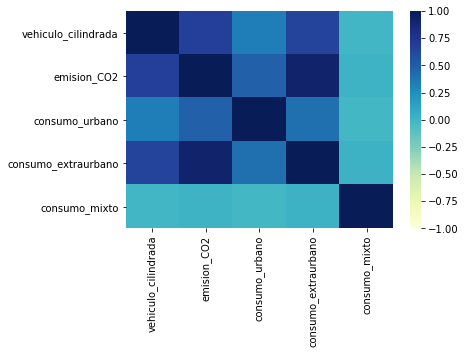

In [373]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu");

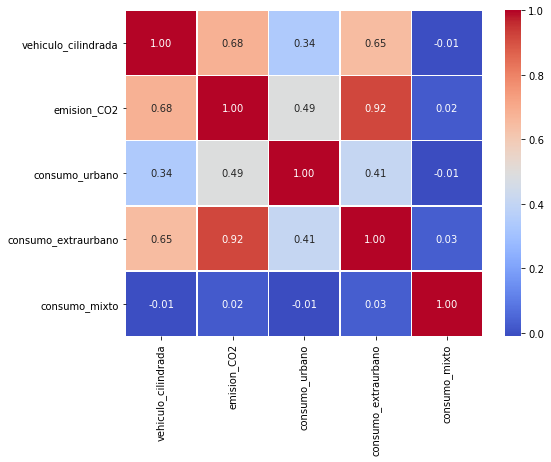

In [374]:
plt.rcParams['figure.figsize']=(8,6)
sns.heatmap(df.corr(),cmap='coolwarm',linewidths=.5,fmt=".2f",annot = True);

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'SUV'),
  Text(1, 0, '4 Puertas'),
  Text(2, 0, '5 Puertas'),
  Text(3, 0, 'Coupe'),
  Text(4, 0, 'Camion'),
  Text(5, 0, 'PICK UP'),
  Text(6, 0, 'Furgon'),
  Text(7, 0, '4x4'),
  Text(8, 0, 'Rural'),
  Text(9, 0, 'BUS')])

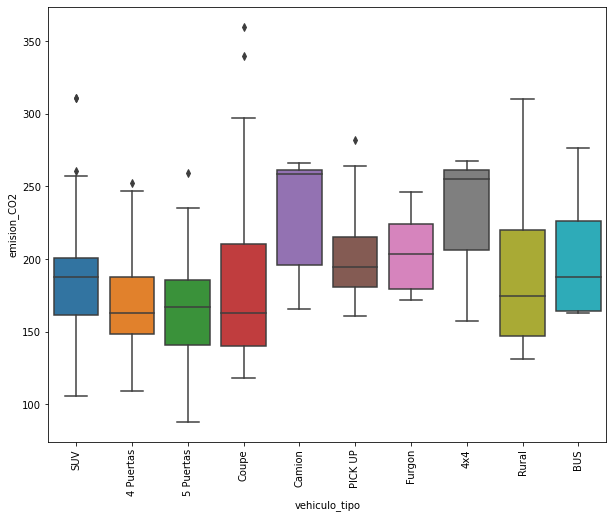

In [375]:
#El boxplot muestra que los camiones y 4x4 emiten mas CO2 comparado a otros tipos de vehiculoss

plt.figure(figsize = (10,8))
sns.boxplot(x="vehiculo_tipo", y="emision_CO2", data=df)
plt.xticks(rotation = 'vertical')


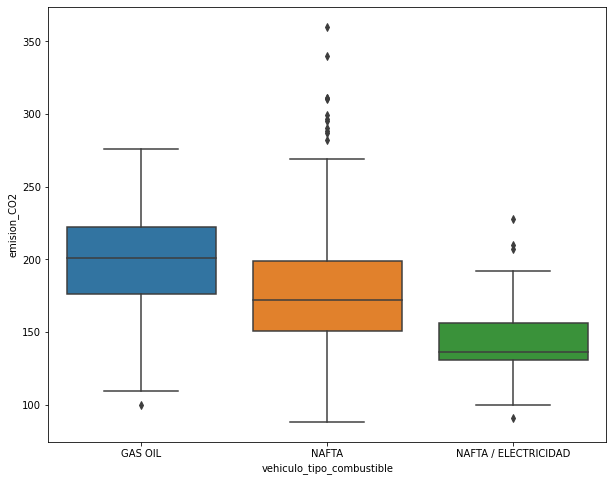

In [376]:
#El boxplot muestra que los vehiculos que usan GAS OIL emiten mas CO2
plt.figure(figsize = (10,8))
sns.boxplot(x = 'vehiculo_tipo_combustible' , y = 'emision_CO2', data = df)
plt.show()

In [377]:
df.head()

,vehiculo_marca,vehiculo_modelo,vehiculo_tipo,vehiculo_traccion,vehiculo_cilindrada,vehiculo_tipo_transmision,vehiculo_tipo_combustible,vehiculo_standard_emision,emision_CO2,consumo_urbano,consumo_extraurbano,consumo_mixto
0,TOYOTA,LAND CRUISER 200,SUV,4x4,4461.0,AUTOMATICA,GAS OIL,EURO V,260.70,11.56,8.94,9.90
1,RENAULT,FLUENCE 2.0 16V,4 Puertas,4x2,1997.0,CVT,NAFTA,EURO V,175.40,10.50,6.10,7.70
2,RENAULT,DUSTER 2.0 16v,5 Puertas,4x2,1998.0,MANUAL,NAFTA,EURO V,198.86,11.13,6.98,8.52
3,RENAULT,DUSTER 2.0 16v 4X4,5 Puertas,4x4,1998.0,MANUAL,NAFTA,EURO V,199.74,11.20,7.01,8.55
4,CITROËN,DS4,Coupe,4x2,1598.0,AUTOMATICA,NAFTA,EURO V,177.60,10.60,6.00,7.70


In [378]:
df.to_csv(path_or_buf='Data/co2_emissions_clean.csv', sep=',',
                   header=True, encoding='utf8', index=False)